<a href="https://colab.research.google.com/github/JumpNShootMan/TP_MachineLearning/blob/Braulio-Balde%C3%B3n/TP_ML_An%C3%A1lisis_Exploratorio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Trabajo Parcial de Machine Learning


In [2]:
!pip install opencv-python==3.4.2.16
!pip install opencv-contrib-python==3.4.2.16

     |████████████████████████████████| 25.0MB 1.9MB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: opencv-python 4.1.2.30
    Uninstalling opencv-python-4.1.2.30:
      Successfully uninstalled opencv-python-4.1.2.30
     |████████████████████████████████| 30.6MB 148kB/s 
  Found existing installation: opencv-contrib-python 4.1.2.30
    Uninstalling opencv-contrib-python-4.1.2.30:
      Successfully uninstalled opencv-contrib-python-4.1.2.30


In [4]:
import cv2
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from pandas.plotting import scatter_matrix
import statsmodels.api as sm
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
data = pd.read_csv('https://raw.githubusercontent.com/JumpNShootMan/TP_MachineLearning/master/datos_banco.csv', encoding='latin-1')
data.head()

,idPrestamo,target,monthly_debt_capacity,var_employment_time_in_months,approved_amount,approved_term,approved_interest_amount,var_net_income,person_gender,credit_history_marital_status,var_max_sbs_qual_12m,person_degree_type_desc,default_request_term,default_request_amount
0,LIBDISP9832897855,1,252.39,9.0,"1,200",6,289.11,1140.125000,MALE,C,NORMAL,Secundaria,1,0
1,LIBDISP9021501745,1,244.57,50.0,"2,200",12,696.15,1061.375000,FEMALE,S,NORMAL,Secundaria,0,0
2,LIBDISP4057314971,0,491.5,64.0,"1,000",3,84.99,2082.196667,FEMALE,S,NORMAL,Secundaria,0,0
3,LIBDISP8375185888,0,848.65,77.0,"1,500",6,221.53,3422.423333,MALE,S,NORMAL,Universitaria,0,0
4,LIBDISP9694463037,0,470.52,82.0,"1,000",3,91.34,1882.090000,FEMALE,S,NORMAL,Universitaria,1,0


#Análisis exploratorio

Tamaño del dataset: 1719 filas y 14 atributos.

In [6]:
data.shape

(1719, 14)

Cantidad de registros por cada valor de la clase objetivo ('target').


In [7]:
data.groupby('target').size()

target
0    1211
1     508
dtype: int64

Cantidad de atributos no nulos por atributo. El único atributo con NaN es "var_employment_time_in_months!, que tiene 200 valores nulos.

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1719 entries, 0 to 1718
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   idPrestamo                     1719 non-null   object 
 1   target                         1719 non-null   int64  
 2   monthly_debt_capacity          1719 non-null   object 
 3   var_employment_time_in_months  1519 non-null   float64
 4   approved_amount                1719 non-null   object 
 5   approved_term                  1719 non-null   int64  
 6   approved_interest_amount       1719 non-null   object 
 7   var_net_income                 1719 non-null   float64
 8   person_gender                  1719 non-null   object 
 9   credit_history_marital_status  1719 non-null   object 
 10  var_max_sbs_qual_12m           1719 non-null   object 
 11  person_degree_type_desc        1719 non-null   object 
 12  default_request_term           1719 non-null   i

Resumen de valores estadísticos de la data

In [9]:
data.describe()

,target,var_employment_time_in_months,approved_term,var_net_income,default_request_term,default_request_amount
count,1719.000000,1519.000000,1719.000000,1719.000000,1719.000000,1719.0
mean,0.295521,33.979592,6.464805,2693.545884,0.507853,0.0
std,0.456409,26.889423,3.009842,1825.694773,0.500084,0.0
min,0.000000,-1.000000,1.000000,0.000000,0.000000,0.0
25%,0.000000,11.000000,6.000000,1750.000000,0.000000,0.0
50%,0.000000,26.000000,6.000000,2373.758333,1.000000,0.0
75%,1.000000,61.000000,6.000000,3075.133333,1.000000,0.0
max,1.000000,87.000000,12.000000,28587.000000,1.000000,0.0


##Exploración de los atributos cualitativos

Función para graficar la cantidad de instancias de cada valor por categoria.

In [174]:
def plotValuesByFeature(feature):
  frequencies = data.groupby(feature).size()

  x_labels = np.sort(data[feature].unique())

  plt.figure(figsize=(6, 4))
  ax = frequencies.plot(kind='bar', color=['blue', 'red', 'green', 'pink', 'cyan', 'brown'])
  ax.set_xticklabels(x_labels)

  rects = ax.patches

  for rect, label in zip(rects, frequencies):
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

  plt.savefig("image_" + feature + ".png")

Cantidad de registros por cada valor del atributo 'person_gender'.

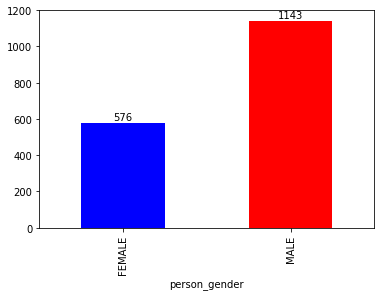

In [175]:
plotValuesByFeature('person_gender')

Cantidad de registros por cada valor del atributo 'credit_history_marital_status'.

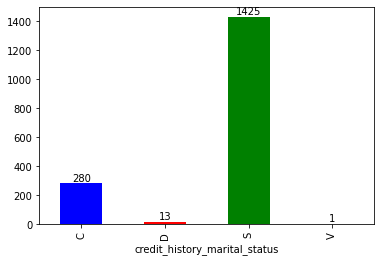

In [176]:
plotValuesByFeature('credit_history_marital_status')

Cantidad de registros por cada valor del atributo 'var_max_sbs_qual_12m'.

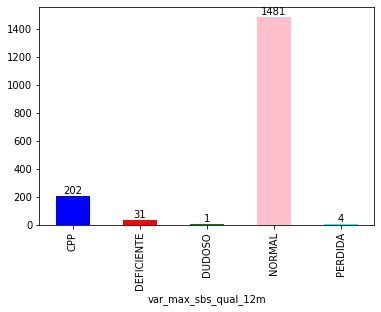

In [177]:
plotValuesByFeature('var_max_sbs_qual_12m')

Cantidad de registros por cada valor del atributo 'person_degree_type_desc'. El valor "Carrera Técnica" fue dividido en dos por los caracteres especiales.

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 131 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 131 missing from current font.
  font.set_text(s, 0, flags=flags)


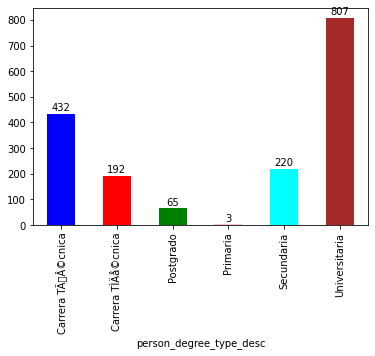

In [178]:
plotValuesByFeature('person_degree_type_desc')

##Exploración de los atributos cuantitativos

Del atributo 'default_request_amount' solo hay data del valor '0', asi que es información innecesaria para la tarea de clasificación.

In [ ]:
data.groupby('default_request_amount').size()

default_request_amount
0    1719
dtype: int64

In [ ]:
del data['default_request_amount']

Conversión de atributos cuantitativos con de valores tipo 'object' a valaores numéricos.

In [ ]:
features = ['monthly_debt_capacity', 'approved_amount', 'approved_interest_amount']

In [ ]:
for i in features:
  for j in range(len(data[i])):
    if type(data[i][j]) == str:
      data[i][j] = data[i][j].replace(',', '')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
for i in features:
  if data[i].dtype == object:
    data[i] = pd.to_numeric(data[i])

Correlación entre los atributos cuantitativos, en el gráfico de abajo se puede observar que hay correlación entre los atributos 'approved_amount', 'appreove_term', 'approved_interest_amount'. Esto es lógico debido a mayor monto de prestamo, mayor el tiempo para pagarlo y mayor el interes.

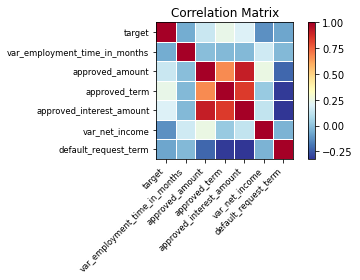

In [ ]:
corr = data.set_index('monthly_debt_capacity').corr()
sm.graphics.plot_corr(corr, xnames=list(corr.columns))
plt.show()

Gráficos de dispersión que representan la relación entre atributos cuantitavos según valor de la clase atributo. En los histrogramas podemos observar que existen outliers.

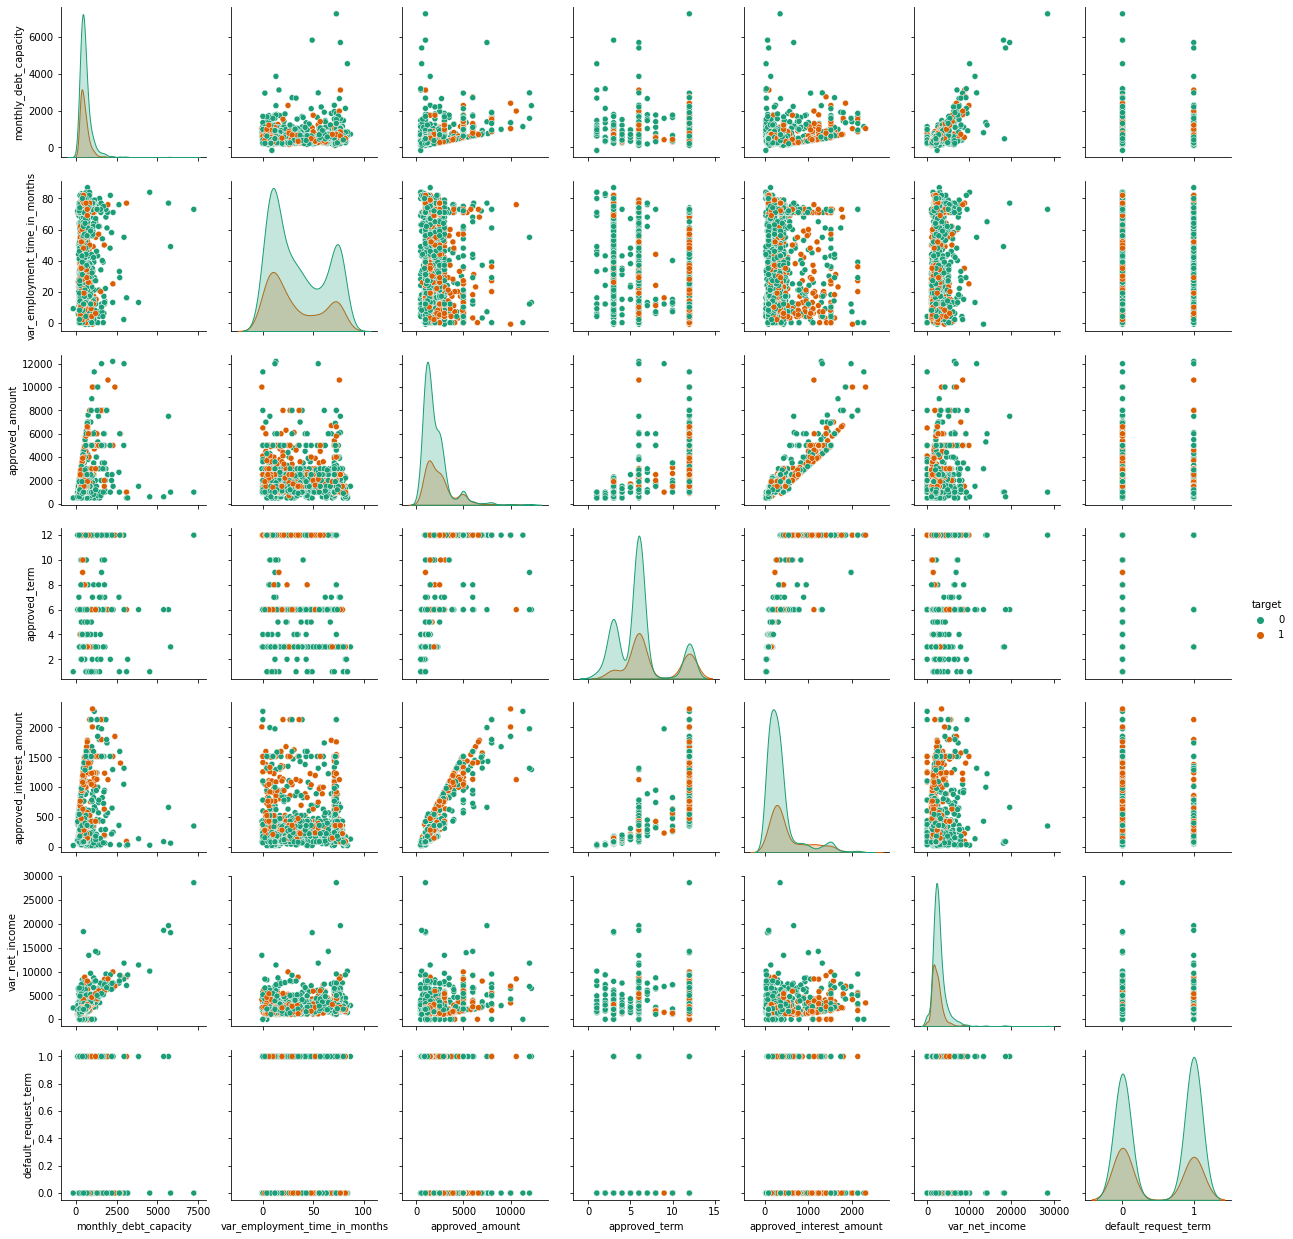

In [ ]:
sns.pairplot(data, hue='target', palette='Dark2')